Autores: Daniel de Paula, Gustavo Guerreiro e Mayara Cardoso Simões

# PARTE 1: Algoritmo Naïve Bayes

Nesta primeira parte do Trabalho você irá aplicar o algoritmo de Naïve Bayes na base de dados de risco de crédito discutida em aula. Para isso você deve primeiramente importar as bibliotecas necessárias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

ERROR! Session/line number was not unique in database. History logging moved to new session 46


In [2]:
# importe a base de dados de risco de crédito e nomeie com: dataset_risco_credito
dataset_risco_credito = pd.read_csv('dataset_risco_credito.csv')

In [3]:
# imprima a base de dados para uma primeira avaliação dos dados
dataset_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


# 1 - Pré-Processamento dos dados

a) DIVISÃO DA BASE DE DADOS

Separe a base de dados dataset_risco_credito em:
 - variável x, com nome: X_risco_credito
 - classe y, com nome: y_risco_credito

DICA: você pode utilizar .iloc para selecionar as colunas da matriz e .values para converter para o numpy array.

In [4]:
x_risco_credito = dataset_risco_credito.iloc[:,0:4].values
y_risco_credito = dataset_risco_credito.iloc[:,4].values

b) APLICAR LABEL ENCODER

Perceba que seus dados possuem atributos categóricos (string). Porém, para aplicar esses dados em um algoritmo de aprendizado você precisa transformá-lo em atributo numérico. 

Como você pode resolver isso?

DICA: Veja o que é e como aplicar o Label Enconder em: https://youtu.be/nLKEkBAbpQo

In [5]:
def label_enconder(coluna):
  le = LabelEncoder()
  coluna_transformada = le.fit_transform(coluna)
  return coluna_transformada

In [6]:
# Apresente o resultado do label enconder
historia = label_enconder(x_risco_credito[:,0]) # história
divida = label_enconder(x_risco_credito[:,1]) # dívida
garantia = label_enconder(x_risco_credito[:,2]) # garantia
renda = label_enconder(x_risco_credito[:,3]) # renda
classes = label_enconder(y_risco_credito) # classes

x_risco_credito[:,0] = historia
x_risco_credito[:,1] = divida
x_risco_credito[:,2] = garantia
x_risco_credito[:,3] = renda
y_risco_credito = classes
print(y_risco_credito)
x_risco_credito

[0 0 2 0 1 1 0 2 1 1 0 2 1 0]


array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

c) SALVAR O ARQUIVO PRÉ-PROCESSADO

In [7]:
# como salvar o arquivo:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

# 2 - Algoritmo Naïve Bayes

In [8]:
# importar da biblioteca sklearn o pacote Nayve Bayes
# utilizamos a distribuição estatística Gaussiana (classe GaussianNB) ou distribuição normal, pois é mais usado para problemas genéricos
from sklearn.naive_bayes import GaussianNB

In [9]:
# Criar o objeto Nayve Bayes
naiveb_risco_credito = GaussianNB()

a) TREINAR O ALGORITMO

Para treinar o algoritmo, você deve gerar a tabela de probabilidades. Para isso, você pode utilizar **.fit** para gerar a tabela.

DICA: O 1º parametro são os atributos/características (x) e o 2º parametro é a classe (y).

OBS: Não se preocupe, o algoritmo faz a correção laplaciana automaticamente :) .

In [10]:
naiveb_risco_credito.fit(x_risco_credito, y_risco_credito)

,priors,None
,var_smoothing,1e-09


b) FAZER A PREVISÃO

Utilize **.predict** para fazer a previsão realizada no exemplo em sala.

i) história boa, dívida alta, garantia nenhuma, renda > 35

ii) história ruim, dívida alta, garantia adequada, renda < 15

Verifique nos slides se seu resultado está correto!

In [11]:
nomes_classes = ['alto', 'baixo', 'moderado']


i = [[0, 0, 1, 2]]
previsao = naiveb_risco_credito.predict(i)
print('I', nomes_classes[previsao[0]])

ii = [[2, 0, 0, 0]]
previsao = naiveb_risco_credito.predict(ii)
print('II', nomes_classes[previsao[0]])

I baixo
II moderado


In [12]:
# utilize o atributo .classes_ para mostrar as classes utilizadas pelo algoritmo
naiveb_risco_credito.classes_

array([0, 1, 2])

In [13]:
# utilize .class_count_ para contar quantos registros tem em cada classe
naiveb_risco_credito.class_count_

array([6., 5., 3.])

## Extra para parte 3 e 4

Taxa de acerto: 93.8%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



0.938

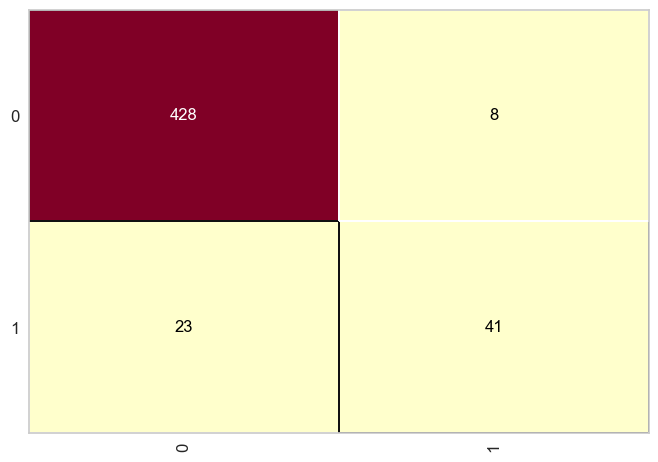

In [14]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report

with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

naiveb_risco_credito.fit(X_credit_treinamento, y_credit_treinamento)

previsao = naiveb_risco_credito.predict(X_credit_teste)

taxa_de_acerto = accuracy_score(y_credit_teste, previsao)
print(f"Taxa de acerto: {taxa_de_acerto*100}%")

print(classification_report(y_credit_teste, previsao))

cm = ConfusionMatrix(naiveb_risco_credito)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)